In [4]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('flight_delays.csv', sep=',', parse_dates=[0])
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


### Доля всех задержек ко всем вылетам

N    80.956
Y    19.044
Name: dep_delayed_15min, dtype: float64


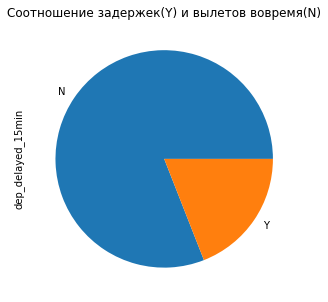

In [6]:
print(df['dep_delayed_15min'].value_counts(normalize=True)*100)
df['dep_delayed_15min'].value_counts(normalize=True).plot(kind='pie', figsize=(5,5))
plt.title('Соотношение задержек(Y) и вылетов вовремя(N)');

### Зависимость количества задержек от длины перелёта

In [7]:
df_modif = df[(df['dep_delayed_15min'] == 'Y')]['Distance'].value_counts(ascending=True).to_frame()
df_new = pd.DataFrame({'Distance' : df_modif.index, 'Number' : df_modif['Distance'].values})

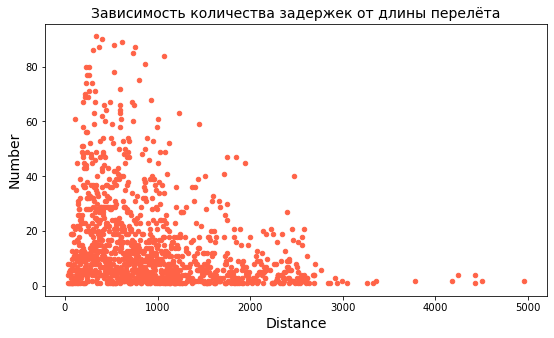

In [8]:
df_new.plot.scatter(x = 'Distance', y = 'Number', c ='Tomato', figsize = (9, 5));
plt.title('Зависимость количества задержек от длины перелёта', fontsize = 14);
plt.xlabel('Distance', fontsize = 14)
plt.ylabel('Number', fontsize = 14)
plt.show()

### Топ 5 направлений, для которых чаще всего происходят задержки

In [9]:
df2 = df[(df['dep_delayed_15min'] == 'Y')][['Origin', 'Dest']].value_counts(ascending=False).to_frame()

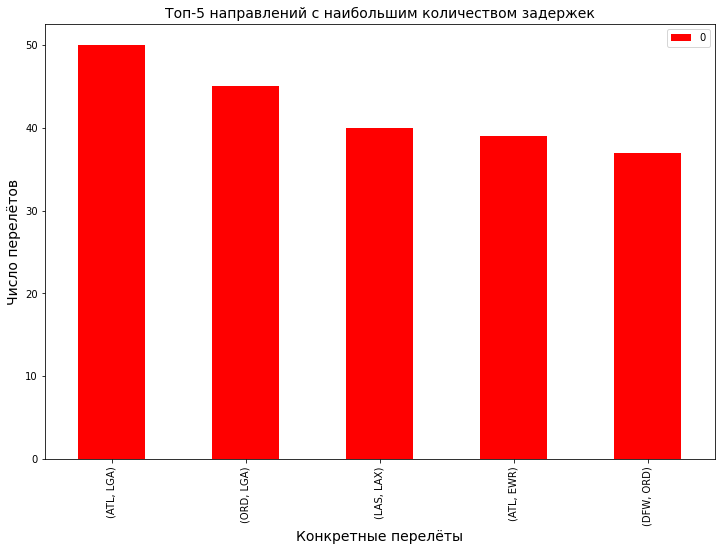

In [10]:
df2.head(5).plot.bar(figsize = (12, 8), color = 'red', label = 'количество перелётов')
plt.title('Топ-5 направлений с наибольшим количеством задержек', fontsize = 14);
plt.xlabel('Конкретные перелёты', fontsize = 14)
plt.ylabel('Число перелётов', fontsize = 14)
plt.show()

### В какие времена года чаще всего происходят задержки рейсов

In [11]:
df3 = df[(df['dep_delayed_15min'] == 'Y')].replace(
    {'Month' : {'c-1':'January', 'c-2':'February', 'c-3':'March', 'c-4':'April', 'c-5':'May', 'c-6':'June',
                'c-7':'July', 'c-8':'August', 'c-9':'September', 'c-10':'October','c-11':'November', 'c-12':'December'}})
                    
df3_new = df3['Month'].value_counts(ascending=False).to_frame()

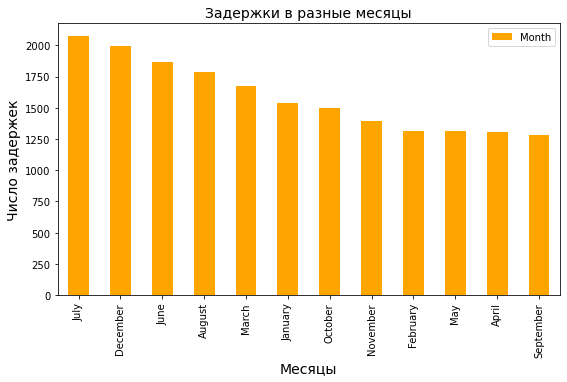

In [12]:
df3_new.plot.bar(figsize = (9, 5), color = 'orange')
plt.title('Задержки в разные месяцы', fontsize = 14);
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Число задержек', fontsize = 14)
plt.show()

### Топ-10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [13]:
No_delayed = df[(df['dep_delayed_15min'] == 'N')]['UniqueCarrier'].value_counts(ascending=False)
delayed = df[(df['dep_delayed_15min'] == 'Y')]['UniqueCarrier'].value_counts(ascending=False)

In [14]:
ratio = delayed/No_delayed

In [15]:
df4 = ratio.sort_values(ascending=True).iloc[0:10]

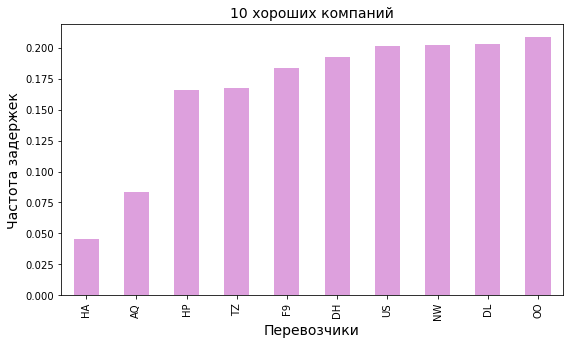

In [16]:
df4.plot.bar(figsize = (9, 5), color = 'plum')
plt.title('10 хороших компаний', fontsize = 14);
plt.xlabel('Перевозчики', fontsize = 14)
plt.ylabel('Частота задержек', fontsize = 14)
plt.show()

### Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [17]:
No_delayed = df[(df['dep_delayed_15min'] == 'N')]['Origin'].value_counts(ascending=False)
delayed = df[(df['dep_delayed_15min'] == 'Y')]['Origin'].value_counts(ascending=False)
ratio = delayed/No_delayed
df5 = ratio.sort_values(ascending=False).iloc[0:10]
print(df['Origin'].value_counts(ascending=False)[['LWB', 'BRW', 'GUC', 'ADQ', 'SCC', 'TEX', 'DLG', 'EGE', 'TUP', 'PSG']])

LWB     4
BRW     7
GUC    12
ADQ     5
SCC     4
TEX     2
DLG     5
EGE    25
TUP     6
PSG    18
Name: Origin, dtype: int64


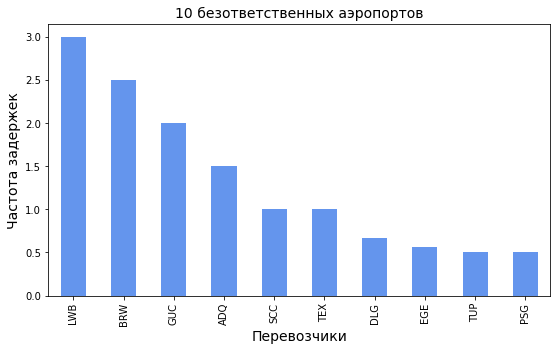

In [18]:
df5.plot.bar(figsize = (9, 5), color = 'cornflowerblue')
plt.title('10 безответственных аэропортов', fontsize = 14);
plt.xlabel('Перевозчики', fontsize = 14)
plt.ylabel('Частота задержек', fontsize = 14)
plt.show()

### Необычная зависимость количества задержек от имеющихся данных

In [19]:
df6 = df[(df['dep_delayed_15min'] == 'Y')].replace(
    {'DayOfWeek' : {'c-1':'Monday', 'c-2':'Tuesday', 'c-3':'Wednesday', 
                    'c-4':'Thursday', 'c-5':'Friday', 'c-6':'Saturday', 'c-7':'Sunday'}})
df6_new = df6['DayOfWeek'].value_counts(ascending=False).to_frame()

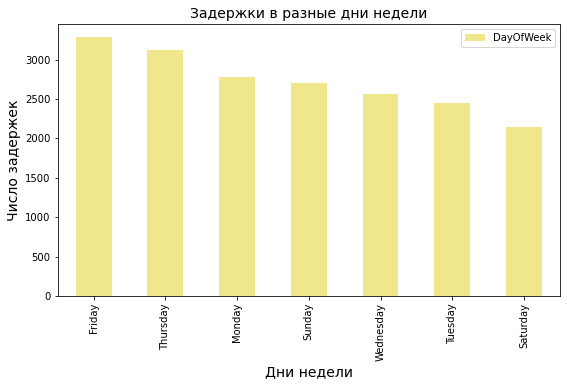

In [20]:
df6_new.plot.bar(figsize = (9, 5), color = 'khaki')
plt.title('Задержки в разные дни недели', fontsize = 14);
plt.xlabel('Дни недели', fontsize = 14)
plt.ylabel('Число задержек', fontsize = 14)
plt.show()